Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [121]:
from sklearn.manifold import TSNE

In [122]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)


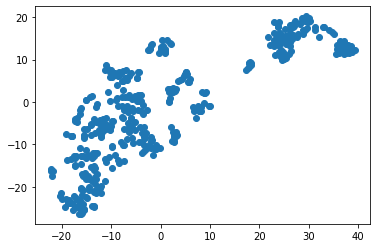

In [123]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [124]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(X_train)

train_labels = model.fit_predict(train_scaled)


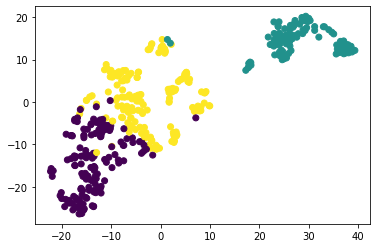

In [126]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=train_labels)
plt.show()

In [127]:
X_train['label'] = train_labels
X_train.groupby('label').mean().CRIM

<ipython-input-127-289e450d309e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['label'] = train_labels


label
0     0.096523
1    12.927382
2     0.705977
Name: CRIM, dtype: float64

In [128]:
X_train['price'] = y_train
X_train.groupby('label').mean().price

<ipython-input-128-b1f279fb463f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['price'] = y_train


label
0    26.836879
1    16.187379
2    23.490625
Name: price, dtype: float64

*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [130]:
test_scaled = scaler.transform(X_test)
test_labels = model.predict(test_scaled)


In [131]:
test_labels

array([2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       0, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0], dtype=int32)

In [132]:
X_test['price'] = y_test
X_test['label'] = test_labels

<ipython-input-132-c761020694ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['price'] = y_test
<ipython-input-132-c761020694ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['label'] = test_labels


In [133]:
X_test.groupby('label').mean().price

label
0    26.989744
1    16.421212
2    19.910000
Name: price, dtype: float64

In [134]:
X_test.groupby('label').mean().CRIM

label
0     0.123679
1    10.707682
2     0.405986
Name: CRIM, dtype: float64

In [135]:
df = pd.DataFrame(X_test.groupby('label').mean().CRIM, columns=['claster', 'CRIM'])


In [136]:
df.claster = df.index

In [137]:
df

,claster,CRIM
label,,
0,0,0.123679
1,1,10.707682
2,2,0.405986
